# A comprehensive analysis of Nigerian food prices

In this project, I analyze the dataset gathered by the Nigeria Data Grid WFP - World Food Programme and see what insights we can get from it. It covers a range of 20 years from 2002 to 2022 and contains the prices of commodities such as maize, rice, beans, yams, fuel etc.

This project is my final milestone for certification from [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

## Loading the Dataset

I have already obtained the dataset in a csv format. So, all I need to do is load it into my program

import pandas as pd
import numpy as np

In [2]:
food_price_df=pd.read_csv('wfp_food_prices_nga.csv')
food_price_df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,0.4244
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,0.3623
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,0.8653
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,0.3754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60524,2022-05-15,Zamfara,Kaura Namoda,Kaura Namoda,12.595190048217773,6.586349964141846,pulses and nuts,Cowpeas (brown),KG,aggregate,Retail,NGN,441.04,1.064
60525,2022-05-15,Zamfara,Kaura Namoda,Kaura Namoda,12.595190048217773,6.586349964141846,pulses and nuts,Cowpeas (white),100 KG,aggregate,Wholesale,NGN,43377.93,104.646
60526,2022-05-15,Zamfara,Kaura Namoda,Kaura Namoda,12.595190048217773,6.586349964141846,pulses and nuts,Cowpeas (white),KG,aggregate,Retail,NGN,420.03,1.0133
60527,2022-05-15,Zamfara,Kaura Namoda,Kaura Namoda,12.595190048217773,6.586349964141846,pulses and nuts,Groundnuts (shelled),100 KG,aggregate,Wholesale,NGN,62264.14,150.2075


## Data Preparation and Cleaning

As we can tell from first glance, our data need a bit of cleaning. As such, we will go through the cleaning process step by step


The first thing I do is removing the first row since it seems to be a repetition of the header with some metatdata

In [3]:
food_price_df.drop(0,inplace=True)

In [4]:
food_price_df.head(4)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,0.4244
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,0.3623
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,0.8653
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,0.3754


By calling the head() method which returns the first rows, we can see that the first row was successfully removed

Let's see the details about our columns

In [5]:
food_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60528 entries, 1 to 60528
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       60528 non-null  object
 1   admin1     60528 non-null  object
 2   admin2     60528 non-null  object
 3   market     60528 non-null  object
 4   latitude   60528 non-null  object
 5   longitude  60528 non-null  object
 6   category   60528 non-null  object
 7   commodity  60528 non-null  object
 8   unit       60528 non-null  object
 9   priceflag  60528 non-null  object
 10  pricetype  60528 non-null  object
 11  currency   60528 non-null  object
 12  price      60528 non-null  object
 13  usdprice   60528 non-null  object
dtypes: object(14)
memory usage: 6.5+ MB


As we can see, we have no null values in the dataset but the price column is typed incorrectly as object but we know that is numeric colums. So, let's fix that

In [6]:
food_price_df.price=pd.to_numeric(food_price_df.price)

As a descriptive convenience, I will rename admin 1 and 2 to state and lga

In [7]:
food_price_df.rename(columns={'admin1':'state','admin2':'lga'},inplace=True)

In [8]:
food_price_df.price=food_price_df.price.round()

Let's also see a random sample of the dataset

In [9]:
food_price_df.sample(4)

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
34298,2019-10-15,Lagos,Kosofe,Lagos,6.61216402053833,3.4018969535827637,cereals and tubers,Gari (white),100 KG,actual,Wholesale,NGN,6548.0,15.7966
59908,2022-05-15,Borno,Maiduguri,Tashan Bama,11.810953140258789,13.182149887084961,oil and fats,Oil (palm),750 ML,actual,Retail,NGN,1258.0,3.0348
7068,2016-01-15,Jigawa,Kaugama,Gujungu,12.362299919128418,9.583600044250488,cereals and tubers,Gari (white),KG,actual,Retail,NGN,105.0,0.2538
29669,2019-04-15,Borno,Maiduguri,Custom,11.850709915161133,13.171241760253906,vegetables and fruits,Watermelons,2.1 KG,actual,Retail,NGN,250.0,0.6031


Seem's like we are good to go!

## Standardizing units and prices

So units are inconsistent with for some commodities, we need to standardize those units in order to have a more coherent results

These are the commodities we have below, so let's standardize them by coverting weight metrics to KG, volume metrics to Ltr and 750 ML and pieces to 1 piece

In [10]:
food_price_df.unit.value_counts()

100 KG        14768
KG            13029
1.3 KG         5428
1.4 KG         3993
L              3833
1.2 KG         3290
750 ML         2438
400 G          1837
0.5 KG         1627
50 KG          1576
20 G           1211
30 pcs         1189
2.1 KG         1180
250 G          1029
300 G           946
3.1 KG          658
1.1 KG          562
3.4 KG          548
1.5 KG          544
Unit            408
100 Tubers      355
100 L            79
Name: unit, dtype: int64

Let's standardizing the units starting with weights

In [11]:
food_price_df.loc[food_price_df.unit=='100 KG','price']=food_price_df.loc[food_price_df.unit=='100 KG','price']/100
food_price_df.loc[food_price_df.unit=='100 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='1.3 KG','price']=food_price_df.loc[food_price_df.unit=='1.3 KG','price']/1.3
food_price_df.loc[food_price_df.unit=='1.3 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='1.4 KG','price']=food_price_df.loc[food_price_df.unit=='1.4 KG','price']/1.4
food_price_df.loc[food_price_df.unit=='1.4 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='1.2 KG','price']=food_price_df.loc[food_price_df.unit=='1.2 KG','price']/1.2
food_price_df.loc[food_price_df.unit=='1.2 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='400 G','price']=food_price_df.loc[food_price_df.unit=='400 G','price']/0.4
food_price_df.loc[food_price_df.unit=='400 G','unit']='KG'

food_price_df.loc[food_price_df.unit=='0.5 KG','price']=food_price_df.loc[food_price_df.unit=='0.5 KG','price']/0.5
food_price_df.loc[food_price_df.unit=='0.5 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='50 KG','price']=food_price_df.loc[food_price_df.unit=='50 KG','price']/50
food_price_df.loc[food_price_df.unit=='50 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='20 G','price']=food_price_df.loc[food_price_df.unit=='20 G','price']/0.02
food_price_df.loc[food_price_df.unit=='20 G','unit']='KG'

food_price_df.loc[food_price_df.unit=='2.1 KG','price']=food_price_df.loc[food_price_df.unit=='2.1 KG','price']/2.1
food_price_df.loc[food_price_df.unit=='2.1 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='250 G','price']=food_price_df.loc[food_price_df.unit=='250 G','price']/0.25
food_price_df.loc[food_price_df.unit=='250 G','unit']='KG'

food_price_df.loc[food_price_df.unit=='300 G','price']=food_price_df.loc[food_price_df.unit=='300 G','price']/0.3
food_price_df.loc[food_price_df.unit=='300 G','unit']='KG'

food_price_df.loc[food_price_df.unit=='3.1 KG','price']=food_price_df.loc[food_price_df.unit=='3.1 KG','price']/3.1
food_price_df.loc[food_price_df.unit=='3.1 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='1.1 KG','price']=food_price_df.loc[food_price_df.unit=='1.1 KG','price']/1.1
food_price_df.loc[food_price_df.unit=='1.1 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='3.4 KG','price']=food_price_df.loc[food_price_df.unit=='3.4 KG','price']/3.4
food_price_df.loc[food_price_df.unit=='3.4 KG','unit']='KG'

food_price_df.loc[food_price_df.unit=='1.5 KG','price']=food_price_df.loc[food_price_df.unit=='1.5 KG','price']/1.5
food_price_df.loc[food_price_df.unit=='1.5 KG','unit']='KG'

# i will convert tuber counts to their estimated weights in KG which is approximately 1 tuber = 4 KG

food_price_df.loc[food_price_df.unit=='100 Tubers','price']=food_price_df.loc[food_price_df.unit=='100 Tubers','price']/400
food_price_df.loc[food_price_df.unit=='100 Tubers','unit']='KG'

Let's stardardize volumes and also pieces

In [12]:
food_price_df.loc[food_price_df.unit=='100 L','price']=food_price_df.loc[food_price_df.unit=='100 L','price']*1e5
food_price_df.loc[food_price_df.unit=='100 L','unit']='750 ML'

food_price_df.loc[~(food_price_df.commodity.str.contains('Fuel')) & (food_price_df.unit=='L'),'price']=food_price_df.loc[~(food_price_df.commodity.str.contains('Fuel')) & (food_price_df.unit=='L'),'price']*1e3
food_price_df.loc[~(food_price_df.commodity.str.contains('Fuel')) & (food_price_df.unit=='L'),'unit']='750 ML'

food_price_df.loc[food_price_df.commodity.str.contains('Fuel'),'price']=food_price_df.loc[food_price_df.commodity.str.contains('Fuel'),'price']
food_price_df.loc[food_price_df.unit=='L','unit']='750 ML'

food_price_df.loc[food_price_df.unit=='30 pcs','price']=food_price_df.loc[food_price_df.unit=='30 pcs','price']/30
food_price_df.loc[food_price_df.unit=='30 pcs','unit']='1 pc'

Checking the unit column for consistency

In [13]:
food_price_df.unit.value_counts()

KG        52581
750 ML     6350
1 pc       1189
Unit        408
Name: unit, dtype: int64

## Removing outliers

I will also remove values I consider to be outliers

In [14]:
food_price_df.drop(food_price_df[(food_price_df.category=='milk and dairy') & (food_price_df.price>3000)].index,inplace=True)

food_price_df.drop(food_price_df[(food_price_df.commodity=='Oil (palm)') & (food_price_df.price>2500)].index,inplace=True)

## Excluding columns

 Next, I exclude columns that would not be of importance. I will remove both langitude, latitude and usdprice columns since we will not need them in our analysis

In [15]:
food_price_df.drop(columns=['latitude','longitude','usdprice'],inplace=True)

I will also change the name of commodity 'Cassava meal (gari, yellow)' to 'Gari (yellow)' and 'Rice (milled, local)' to 'Rice (local)'

In [16]:
food_price_df.loc[food_price_df.commodity=='Cassava meal (gari, yellow)','commodity']='Gari (yellow)'
food_price_df.loc[food_price_df.commodity=='Rice (milled, local)','commodity']='Rice (local)'

Let's take a random sample and see what it tells us

In [17]:
food_price_df.sample(5)

,date,state,lga,market,category,commodity,unit,priceflag,pricetype,currency,price
6448,2015-10-15,Zamfara,Kaura Namoda,Kaura Namoda,cereals and tubers,Sorghum (white),KG,actual,Wholesale,NGN,53.45
56199,2022-01-15,Adamawa,Hong,Mubi,cereals and tubers,Rice (local),KG,aggregate,Retail,NGN,344.00
11232,2016-12-15,Yobe,Jakusko,Jakusko,oil and fats,Oil (palm),750 ML,actual,Retail,NGN,467.00
37331,2020-02-15,Jigawa,Kaugama,Gujungu,non-food,Fuel (petrol-gasoline),750 ML,actual,Retail,NGN,144.00
41710,2020-08-15,Jigawa,Kaugama,Gujungu,cereals and tubers,Rice (local),KG,aggregate,Wholesale,NGN,362.26


Everything is now good, let's start analysing the data

## Exploratory Analysis and Visualization

In this section, we analyse our prepared data for some insights

Let's see all the categories present in this data

In [18]:
food_price_df.category.unique()

array(['cereals and tubers', 'pulses and nuts', 'non-food',
       'oil and fats', 'meat, fish and eggs', 'milk and dairy',
       'vegetables and fruits', 'miscellaneous food'], dtype=object)

We have 8 categories of commodity, namely:

- cereals and tubers
- pulses and nuts
- non-food
- oil and fats
- meat, fish and eggs
- milk and dairy
- vegetables and fruits
- miscellaneous food

Let's take a look at all the commodities present in our dataset

In [19]:
for index, commodity in enumerate(np.sort(food_price_df.commodity.unique()),start=1):
    print('{}. {}'.format(index,commodity))

1. Bananas
2. Beans (niebe)
3. Beans (red)
4. Beans (white)
5. Bread
6. Cowpeas
7. Cowpeas (brown)
8. Cowpeas (white)
9. Eggs
10. Fish
11. Fuel (diesel)
12. Fuel (petrol-gasoline)
13. Gari (white)
14. Gari (yellow)
15. Groundnuts
16. Groundnuts (shelled)
17. Maize
18. Maize (white)
19. Maize (yellow)
20. Maize flour
21. Meat (beef)
22. Meat (goat)
23. Milk
24. Millet
25. Oil (palm)
26. Oil (vegetable)
27. Onions
28. Oranges
29. Rice (imported)
30. Rice (local)
31. Salt
32. Sorghum
33. Sorghum (brown)
34. Sorghum (white)
35. Spinach
36. Sugar
37. Tomatoes
38. Watermelons
39. Wheat
40. Yam
41. Yam (Abuja)


## Creating seperate dataframes

Judging by the data, it would make more sense to seperate the categories into several dataframes for more convenience

In [20]:
cereals_tuber_df=food_price_df[food_price_df.category=='cereals and tubers'].copy()
pulses_nuts_df=food_price_df[food_price_df.category=='pulses and nuts'].copy()
non_food_df=food_price_df[food_price_df.category=='non-food'].copy()
oil_fats_df=food_price_df[food_price_df.category=='oil and fats'].copy()
meat_fish_eggs_df=food_price_df[food_price_df.category=='meat, fish and eggs'].copy()
vegetable_fruits_df=food_price_df[food_price_df.category=='vegetables and fruits'].copy()
misc_df=food_price_df[food_price_df.category=='miscellaneous food'].copy()

Let's calculate the average (mean) price for each item for the last 20 years both wholesale and retail

In [21]:
commodities=np.sort(food_price_df.commodity.unique())
mean_price_df=pd.DataFrame(columns=['commodity','average retail price','retail unit','average wholesale price','wholesale unit'],)
for commodity in commodities:
    mean_retail_price=np.round(food_price_df.loc[(food_price_df.commodity==commodity) & (food_price_df.pricetype=='Retail'),'price'].mean())
    mean_wholesale_price=np.round(food_price_df.loc[(food_price_df.commodity==commodity) & (food_price_df.pricetype=='Wholesale'),'price'].mean())
    
    retail_units=food_price_df.loc[(food_price_df.commodity==commodity) & (food_price_df.pricetype=='Retail'),'unit']
    wholesale_units=food_price_df.loc[(food_price_df.commodity==commodity) & (food_price_df.pricetype=='Wholesale'),'unit']
    
    retail_unit=retail_units.iloc[0] if retail_units.size>0 else ''
    wholesale_unit=wholesale_units.iloc[0] if wholesale_units.size>0 else ''
    
    row=pd.DataFrame({'commodity':commodity,'average retail price':mean_retail_price,'retail unit':retail_unit,
                      'average wholesale price':mean_wholesale_price,'wholesale unit':wholesale_unit},index=[mean_price_df.size])
    mean_price_df=pd.concat([mean_price_df,row],ignore_index=True)
    
mean_price_df=mean_price_df.fillna('')
mean_price_df

,commodity,average retail price,retail unit,average wholesale price,wholesale unit
0,Bananas,159.0,KG,,
1,Beans (niebe),,,240.0,KG
2,Beans (red),375.0,KG,,
3,Beans (white),341.0,KG,,
4,Bread,240.0,Unit,,
5,Cowpeas,260.0,KG,,
6,Cowpeas (brown),359.0,KG,263.0,KG
7,Cowpeas (white),319.0,KG,240.0,KG
8,Eggs,38.0,1 pc,,
9,Fish,298.0,KG,,


## Visualizing our data

We have been working with tables to present our data, it would be better to visualize our data in a better way. I will use charts and graphs to visualize key aspects of our data

Let's import the necessary modules

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

I will create graphs showing the changes in the monthly retail price of some key items over the last twenty years


I will also approximate vlaues to their closest denomination in Naira e.g 929 will be 930

## Rice

In [23]:
rice_imported_df=cereals_tuber_df[cereals_tuber_df.commodity=='Rice (imported)'].copy()
rice_local_df=cereals_tuber_df[cereals_tuber_df.commodity=='Rice (local)'].copy()

Let's see a summary of the prices of both imported and local rice

I will a helper function in order to not keep repeating the same code again

In [24]:
def summary_df(dataframes,names):
    """This function create a statistical table of the given dataframes and their names"""
    summary_list=[]
    for dataframe,name in zip(dataframes,names):
        dataframe=dataframe.describe().transpose().round()
        dataframe.insert(0,'type',name)
        summary_list.append(dataframe)
    return pd.concat(summary_list)

In [25]:
summary_df([rice_imported_df,rice_local_df],['rice (imported)','rice (local)'])

,type,count,mean,std,min,25%,50%,75%,max
price,rice (imported),3516.0,417.0,147.0,94.0,320.0,411.0,509.0,929.0
price,rice (local),3440.0,327.0,114.0,80.0,250.0,304.0,405.0,1157.0


The highest price for imported rice is 930, minimum is 95, the middle price is 410 and the average price is 420 

The highest price for local rice is 1160, minimum is 80, the middle price is 300 and the average price is 330

From this summary,it appear that local rice has a cheaper price rate with less variation as compared to imported rice

### Let's visualize all these

I will start with imported rice

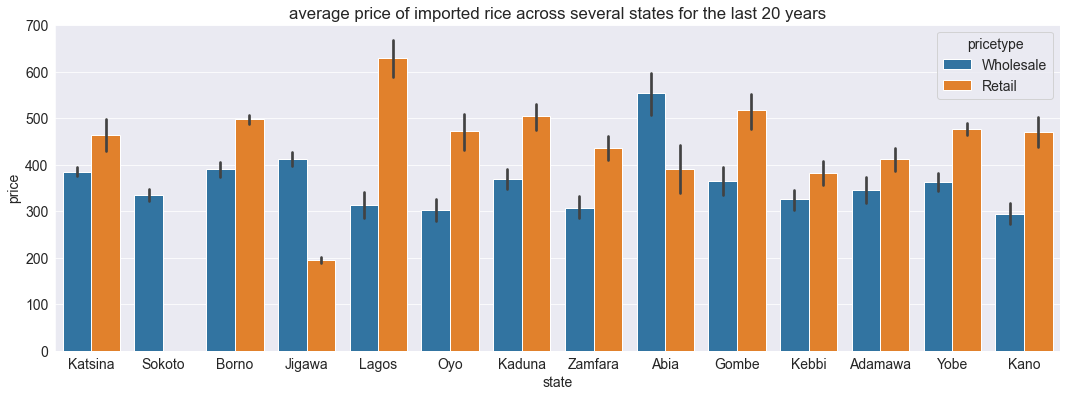

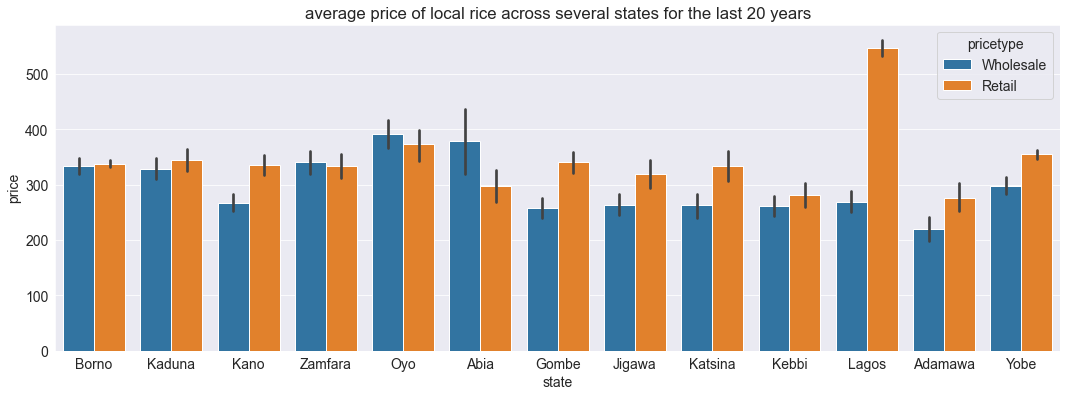

In [26]:
plt.title('average price of imported rice across several states for the last 20 years')
sns.barplot(x='state',y='price',hue='pricetype',data=rice_imported_df);
plt.show()
plt.title('average price of local rice across several states for the last 20 years')
sns.barplot(x='state',y='price',hue='pricetype',data=rice_local_df);
plt.show()

As we can see there seems to be variation in the prices across the states with the highest retail price being in Lagos and the highest wholesale price being in Abia

There seems to be less variation in the prices of local rice as compared with imported rice with an unusually high retail price being in Lagos

## Maize

In [27]:
maize_df=cereals_tuber_df[cereals_tuber_df.commodity=='Maize'].copy()
maize_white_df=cereals_tuber_df[cereals_tuber_df.commodity=='Maize (white)'].copy()
maize_yellow_df=cereals_tuber_df[cereals_tuber_df.commodity=='Maize (yellow)'].copy()
maize_flour_df=cereals_tuber_df[cereals_tuber_df.commodity=='Maize flour'].copy()

Let's see a descriptive summary of the prices of all the maize variety

In [28]:
summary_df([maize_df,maize_white_df,maize_yellow_df,maize_flour_df],['maize','maize (white)','maize (yellow)','maize flour'])

,type,count,mean,std,min,25%,50%,75%,max
price,maize,571.0,173.0,38.0,68.0,151.0,174.0,196.0,277.0
price,maize (white),2160.0,125.0,64.0,24.0,75.0,107.0,172.0,400.0
price,maize (yellow),1811.0,139.0,67.0,32.0,87.0,125.0,186.0,463.0
price,maize flour,1216.0,197.0,74.0,58.0,147.0,181.0,231.0,519.0


The highest price among all is yellow maize at 460 and minimum is white maize at 25

Let's plot a line chart to see the changes in their prices over the years

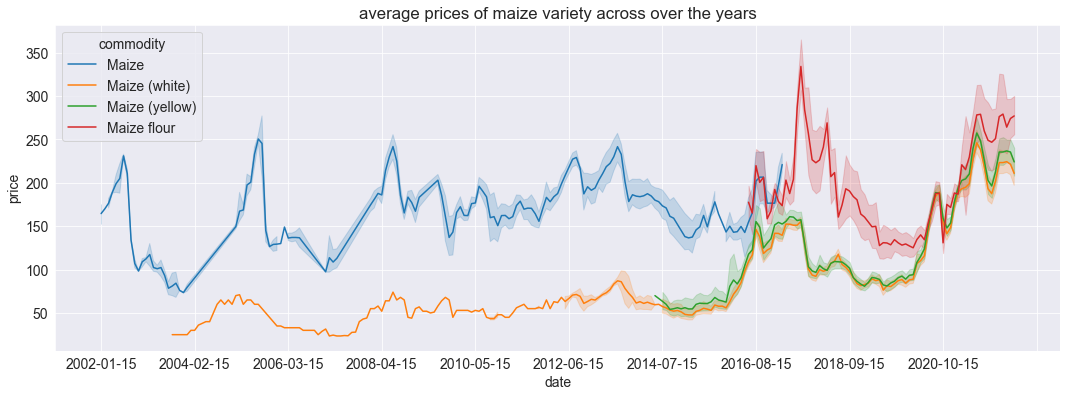

In [29]:
maize_var_df=cereals_tuber_df[cereals_tuber_df.commodity.str.startswith('Maize')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.title('average prices of maize variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=maize_var_df);

As we can see, the data for regular maize and white maize are the most comprehensive. Regular maize spiked at around 2006 while the recent and highest price increase was for maize flour around 2018.

All their prices seem to be increasing with minor drops for white maize and yellow maize

## Sorghum

Our analysis for sorghum will be similar to maize

In [30]:
sorghum_df=cereals_tuber_df[cereals_tuber_df.commodity=='Sorghum'].copy()
sorghum_brown_df=cereals_tuber_df[cereals_tuber_df.commodity=='Sorghum (brown)'].copy()
sorghum_white_df=cereals_tuber_df[cereals_tuber_df.commodity=='Sorghum (white)'].copy()

Let's see a descriptive summary of the prices of all the sorghum variety

In [31]:
summary_df([sorghum_df,sorghum_brown_df,sorghum_white_df],['sorghum','sorghum (brown)','sorghum (white)'])

,type,count,mean,std,min,25%,50%,75%,max
price,sorghum,1738.0,152.0,55.0,38.0,109.0,149.0,186.0,464.0
price,sorghum (brown),1874.0,143.0,76.0,30.0,81.0,135.0,190.0,478.0
price,sorghum (white),2126.0,134.0,77.0,18.0,72.0,118.0,182.0,511.0


The highest price among all is white sorghum at 510 and minimum is also white sorghum

Let's plot a line chart to see the changes in their prices over the years

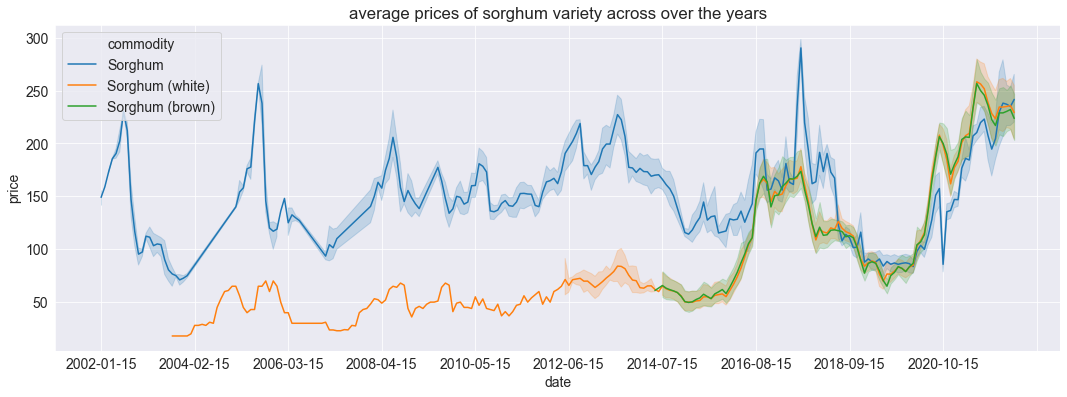

In [32]:
sorghum_var_df=cereals_tuber_df[cereals_tuber_df.commodity.str.startswith('Sorghum')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.title('average prices of sorghum variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=sorghum_var_df);

Regular sorghum had the price increases of all, both at around 2005 and 2017. At around mid 2014 when the data of brown sorghum was first collected, its price and that of white sorghum have been going hand in hand with little differencesin their prices

## Beans

In [33]:
beans_red_df=pulses_nuts_df[pulses_nuts_df.commodity=='Beans (red)'].copy()
beans_white_df=pulses_nuts_df[pulses_nuts_df.commodity=='Beans (white)'].copy()
beans_niebe_df=pulses_nuts_df[pulses_nuts_df.commodity=='Beans (niebe)'].copy()

Let's see a descriptive summary of the prices of all the beans variety

In [34]:
summary_df([beans_red_df,beans_white_df,beans_niebe_df],['beans (red)','beans (white)','beans (niebe)'])

,type,count,mean,std,min,25%,50%,75%,max
price,beans (red),1213.0,375.0,182.0,104.0,231.0,323.0,500.0,958.0
price,beans (white),1206.0,341.0,161.0,104.0,222.0,292.0,458.0,833.0
price,beans (niebe),24.0,240.0,99.0,112.0,167.0,236.0,269.0,419.0


The highest price among all is niebe beans at 960 and minimum are both red beans and white beans at 100. There seems to be something interresting happening here since both red and white beans have the highest and lowest prices collectively

Let's plot a line chart to see the changes in their prices over the years

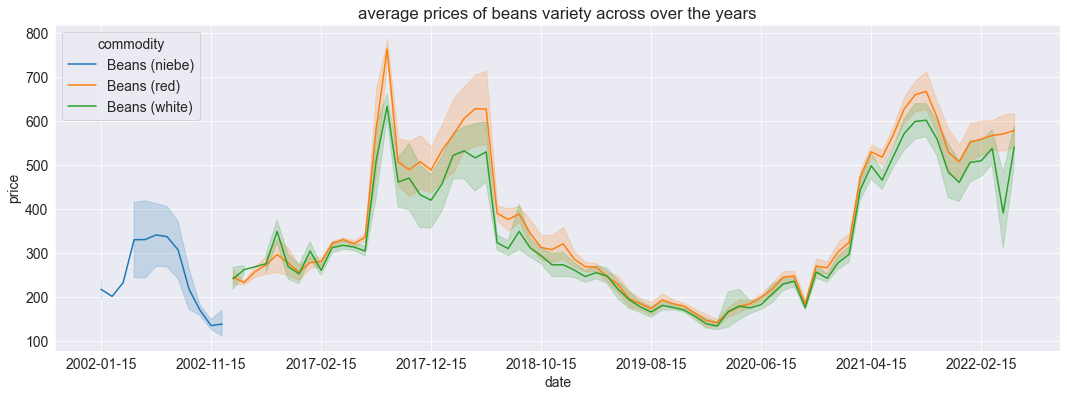

In [35]:
beans_var_df=pulses_nuts_df[pulses_nuts_df.commodity.str.startswith('Beans')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of beans variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=beans_var_df);

The prices of niebe is not available after 2002 and the prices for both red and white beans were collected after 2002. And also, the prices of both red and white beans have been going hand in had with very little differences, I think this explains our anomaly from the statistical summary above

## Yam

In [36]:
yam_df=cereals_tuber_df[cereals_tuber_df.commodity=='Yam'].copy()
yam_abuja_df=cereals_tuber_df[cereals_tuber_df.commodity=='Yam (Abuja)'].copy()

Let's see a descriptive summary of the prices of all the yam variety

In [37]:
summary_df([yam_df,yam_abuja_df],['yam','yam (Abuja)'])

,type,count,mean,std,min,25%,50%,75%,max
price,yam,2881.0,217.0,154.0,1.0,121.0,178.0,265.0,1429.0
price,yam (Abuja),57.0,162.0,108.0,40.0,71.0,130.0,216.0,452.0


Regular yam has highest price of both at 1430 and the minimum at 1 which seems to be an outlier

Let's plot a line chart to see the changes in their prices over the years

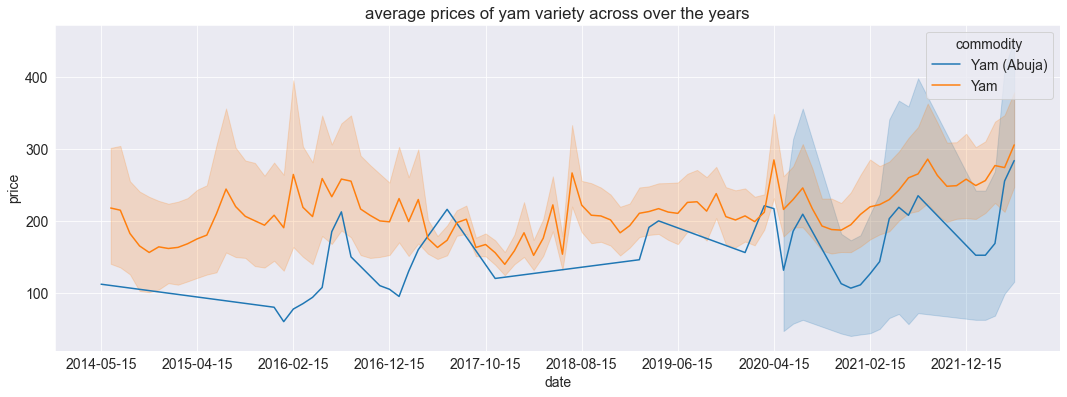

In [38]:
yam_var_df=cereals_tuber_df[cereals_tuber_df.commodity.str.startswith('Yam')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of yam variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=yam_var_df);

It seems that the data for both yams started to be collected around 2014. Both have lots of variation in their prices over the years, though Abuja yam seems to have high and low prices at different regions recently

## Cowpeas

In [39]:
cowpeas_df=pulses_nuts_df[pulses_nuts_df.commodity=='Cowpeas'].copy()
cowpeas_brown_df=pulses_nuts_df[pulses_nuts_df.commodity=='Cowpeas (brown)'].copy()
cowpeas_white_df=pulses_nuts_df[pulses_nuts_df.commodity=='Cowpeas (white)'].copy()

Let's see a descriptive summary of the prices of all the cowpea variety

In [40]:
summary_df([cowpeas_df,cowpeas_brown_df,cowpeas_white_df],['cowpeas','cowpeas (brown)','cowpeas (white)'])

,type,count,mean,std,min,25%,50%,75%,max
price,cowpeas,926.0,260.0,101.0,132.0,192.0,208.0,333.0,1468.0
price,cowpeas (brown),1789.0,293.0,160.0,2.0,171.0,248.0,380.0,1040.0
price,cowpeas (white),1913.0,265.0,143.0,75.0,157.0,226.0,341.0,905.0


The highest price is regular cowpeas at 1470 and the brown cowpeas at 2 which seems to be an outlier

Let's plot a line chart to see the changes in their prices over the years

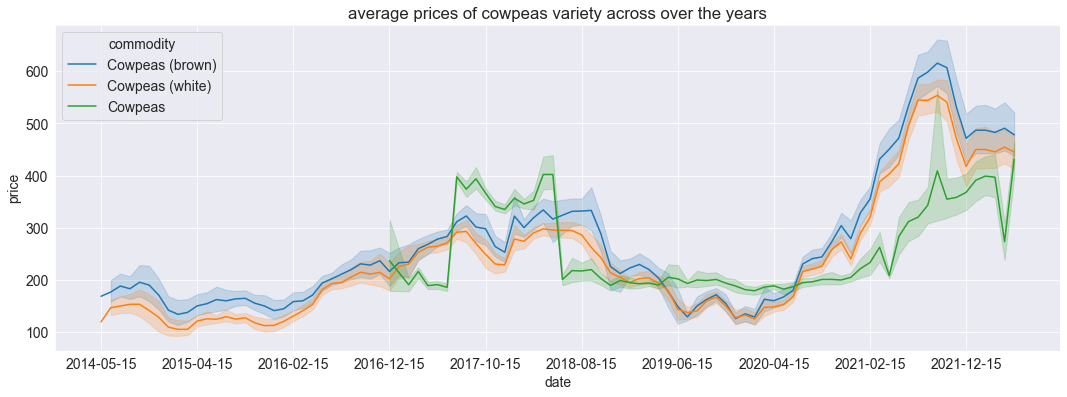

In [41]:
cowpeas_var_df=pulses_nuts_df[pulses_nuts_df.commodity.str.startswith('Cowpeas')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of cowpeas variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=cowpeas_var_df);

Both brown and white cowpeas have at simiar prices with very little differences and they also spiked at mid 2021 but their prices seem to be dropping unlike regular cowpeas which seems to be rising again after dropping

## Gari

In [42]:
gari_white_df=cereals_tuber_df[cereals_tuber_df.commodity=='Gari (white)'].copy()
gari_yellow_df=cereals_tuber_df[cereals_tuber_df.commodity=='Gari (yellow)'].copy()

Let's see a descriptive summary of the prices of all the variety of the almighty gari

In [43]:
summary_df([gari_white_df,gari_yellow_df],['gari (white)','gari (yellow)'])

,type,count,mean,std,min,25%,50%,75%,max
price,gari (white),1853.0,184.0,107.0,39.0,105.0,159.0,241.0,1837.0
price,gari (yellow),1620.0,216.0,115.0,44.0,130.0,184.0,286.0,600.0


White gari has highest price of both at 1840 and the minimum at 40

Let's plot a line chart to see the changes in their prices over the years

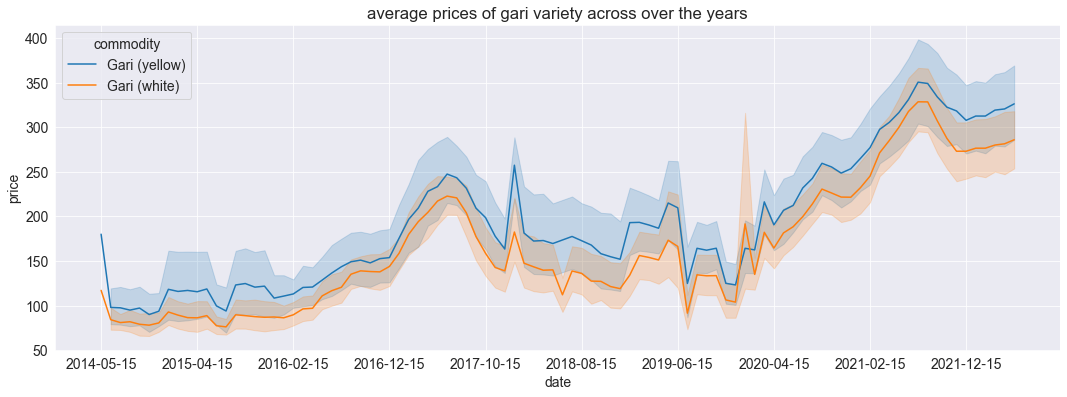

In [44]:
gari_var_df=cereals_tuber_df[cereals_tuber_df.commodity.str.startswith('Gari')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of gari variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=gari_var_df);

There seems to be an incease in the price of both gari varities with the same distribution pattern and little price difference, both are almost four times thier initial prices. Judging from this data, the pice of gari isn't coming down soon

## Groundnut

In [45]:
groundnut_df=pulses_nuts_df[pulses_nuts_df.commodity=='Groundnuts'].copy()
groundnut_shelled_df=pulses_nuts_df[pulses_nuts_df.commodity=='Groundnuts (shelled)'].copy()

Let's see a descriptive summary of the prices of all the variety of groundnuts

In [46]:
summary_df([groundnut_df,groundnut_shelled_df],['groundnuts','groundnuts (shelled)'])

,type,count,mean,std,min,25%,50%,75%,max
price,groundnuts,1220.0,404.0,151.0,159.0,292.0,364.0,500.0,955.0
price,groundnuts (shelled),1893.0,334.0,153.0,76.0,224.0,283.0,411.0,861.0


As I expected, regular goundnut has the highest price at 955 while shelled groundnuts have the lowest price at 80

Let's plot a line chart to see the changes in their prices over the years

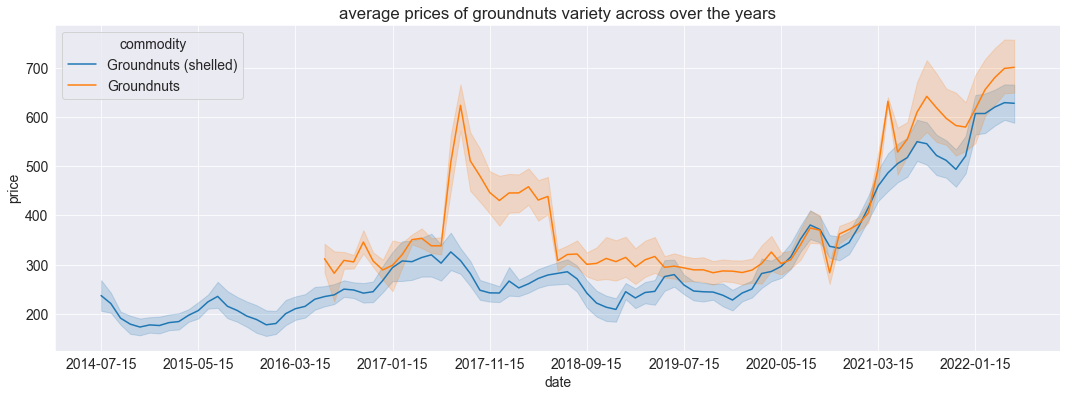

In [47]:
groundnut_var_df=pulses_nuts_df[pulses_nuts_df.commodity.str.startswith('Groundnuts')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of groundnuts variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=groundnut_var_df);

Regular groundnuts spiked in price in mid 2017 and also seems to be rising again more than before while shelled groundnuts rose steadily to almost the pice as regular goundnuts. Both are almost seven times their initial prices

## Millet and Wheat

In [48]:
millet_df=cereals_tuber_df[cereals_tuber_df.commodity=='Millet'].copy()
wheat_df=cereals_tuber_df[cereals_tuber_df.commodity=='Wheat'].copy()

Let's see a descriptive summary of the price of both millet and wheat

In [49]:
summary_df([millet_df,wheat_df],['millet','wheat'])

,type,count,mean,std,min,25%,50%,75%,max
price,millet,3815.0,150.0,65.0,22.0,103.0,143.0,192.0,453.0
price,wheat,61.0,193.0,43.0,106.0,167.0,187.0,230.0,308.0


Millet has its highest price at 450, middle price at 140 and minimum price at 20. The average price of millet is 150

Wheat has its highest price at 310, middle price at 190 and minimum price at 120. The average price of millet is 190

Let's plot a line chart to see the changes in their prices over the years

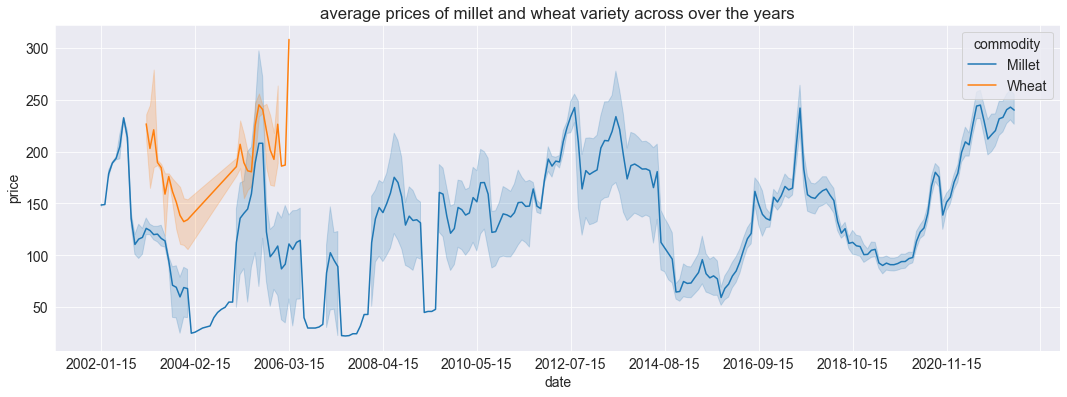

In [50]:
millet_wheat_df=pd.concat([millet_df,wheat_df])
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
plt.title('average prices of millet and wheat variety across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=millet_wheat_df);

Millet spiked in price around 2005 and then steadily went down again, fluctuated massively and also seems to be rising in price again

Wheat spiked around 2006 before being unavailable the dataset

## Oil

In [51]:
oil_palm_df=oil_fats_df[oil_fats_df.commodity=='Oil (palm)'].copy()
oil_veg_df=oil_fats_df[oil_fats_df.commodity=='Oil (vegetable)'].copy()

Let's see a descriptive summary of the prices of cooking oils

In [52]:
summary_df([oil_palm_df,oil_veg_df],['oil (palm)','oil (vegetable)'])

,type,count,mean,std,min,25%,50%,75%,max
price,oil (palm),1231.0,494.0,170.0,9.0,375.0,471.0,600.0,1400.0
price,oil (vegetable),1219.0,498.0,180.0,10.0,375.0,450.0,600.0,1346.0


palm oil has the highest price of both oils at 1400 while they both seem to have a simialr minimum price of 10

Let's plot a line chart to see the changes in their prices over the years

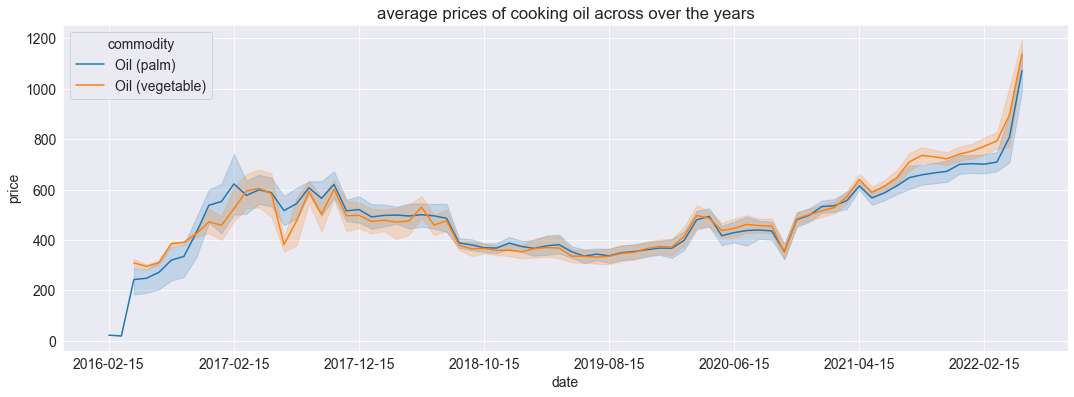

In [53]:
oil_var_df=oil_fats_df[oil_fats_df.commodity.str.startswith('Oil')].copy()
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of cooking oil across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=oil_var_df);

The prices of both vegetable and palm oil seems be rising in pice with both having almost the same pices over the years

## Meat and Fish

In [54]:
meat_beef_df=meat_fish_eggs_df[meat_fish_eggs_df.commodity=='Meat (beef)'].copy()
meat_goat_df=meat_fish_eggs_df[meat_fish_eggs_df.commodity=='Meat (goat)'].copy()
fish_df=meat_fish_eggs_df[meat_fish_eggs_df.commodity=='Fish'].copy()

Let's see a descriptive summary of the prices of meat and fish

In [55]:
summary_df([meat_beef_df,meat_goat_df,fish_df],['meat (beef)','meat (goat)','fish'])

,type,count,mean,std,min,25%,50%,75%,max
price,meat (beef),1211.0,1216.0,311.0,475.0,1050.0,1200.0,1250.0,4533.0
price,meat (goat),1211.0,1264.0,296.0,500.0,1100.0,1200.0,1308.0,3850.0
price,fish,1202.0,298.0,205.0,21.0,150.0,229.0,417.0,800.0


Beef meat has the highest pice at 4530 while fish has the minimum price. Both meat seemto have similar prices with litlle difference

Let's plot a line chart to see the changes in their prices over the years

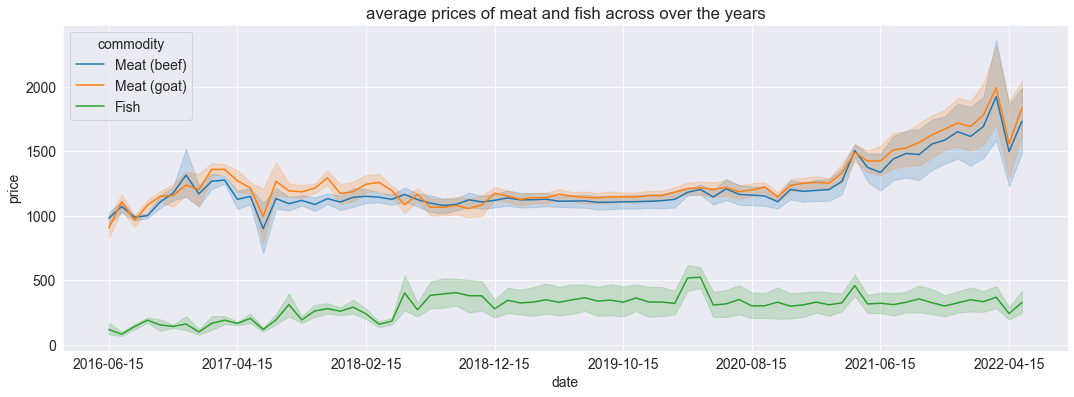

In [56]:
meat_fish_df=pd.concat([meat_fish_eggs_df[meat_fish_eggs_df.commodity.str.startswith('Meat')],fish_df])
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of meat and fish across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=meat_fish_df);

Both beef and goat meat seem to have similar prices over the years, though steadily rising. Fish has comparatively lower price and has maintained a steady price over the years

## Bread and Eggs

In [57]:
bread_df=cereals_tuber_df[cereals_tuber_df.commodity=='Bread'].copy()
eggs_df=meat_fish_eggs_df[meat_fish_eggs_df.commodity=='Eggs'].copy()

Let's see a descriptive summary of the prices of bread and eggs

In [58]:
summary_df([bread_df,eggs_df],['bread','eggs'])

,type,count,mean,std,min,25%,50%,75%,max
price,bread,408.0,240.0,83.0,97.0,193.0,234.0,271.0,415.0
price,eggs,1189.0,38.0,9.0,16.0,33.0,35.0,40.0,70.0


The highest price for bread is 415, the minimum is 100 and the average price is 240

While the highest price for an egg is 70, the minimum is 15 and the average price for an egg is 40

Let's plot a line chart to see the changes in their prices over the years

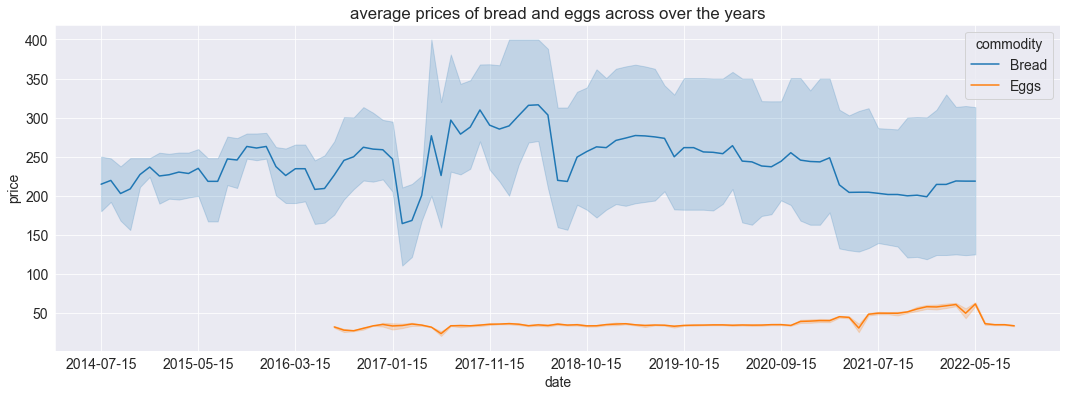

In [59]:
bread_eggs_df=pd.concat([bread_df,eggs_df])
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of bread and eggs across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=bread_eggs_df);

The price for bread seems to be rising in some regions while also falling some regions but, averagely, it seems to be falling altogether

While the price for an egg remain relatively the same over the years

## Fruits and Vegetables

In [60]:
watermelons_df=vegetable_fruits_df[vegetable_fruits_df.commodity=='Watermelons'].copy()
oranges_df=vegetable_fruits_df[vegetable_fruits_df.commodity=='Oranges'].copy()
bananas_df=vegetable_fruits_df[vegetable_fruits_df.commodity=='Bananas'].copy()
tomatoes_df=vegetable_fruits_df[vegetable_fruits_df.commodity=='Tomatoes'].copy()
onions_df=vegetable_fruits_df[vegetable_fruits_df.commodity=='Onions'].copy()
spinach_df=vegetable_fruits_df[vegetable_fruits_df.commodity=='Spinach'].copy()

Let's see a descriptive summary of the prices of bread and eggs

In [61]:
summary_df([watermelons_df,oranges_df,bananas_df,tomatoes_df,onions_df,spinach_df],['watermelons','oranges','bananas','tomatoes','onions','spinach'])

,type,count,mean,std,min,25%,50%,75%,max
price,watermelons,1180.0,128.0,60.0,24.0,90.0,119.0,167.0,655.0
price,oranges,1179.0,259.0,332.0,25.0,155.0,250.0,250.0,3900.0
price,bananas,1164.0,159.0,68.0,15.0,115.0,154.0,192.0,625.0
price,tomatoes,1074.0,148.0,72.0,30.0,100.0,130.0,200.0,600.0
price,onions,1211.0,213.0,106.0,50.0,143.0,200.0,250.0,1100.0
price,spinach,946.0,219.0,273.0,17.0,117.0,167.0,167.0,2167.0


The fruit with the highest price is orange at 415 and the minimum is banana at 15

While the highest priced vegetable is onion at 1100 and the minimum is tomatoes 

Let's plot a line chart to see the changes in their prices over the years

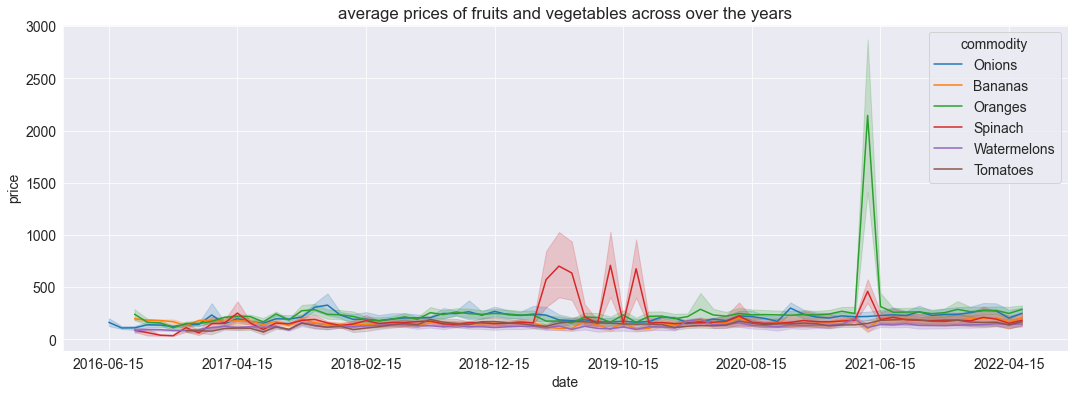

In [62]:
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of fruits and vegetables across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=vegetable_fruits_df);

All fruits and vegetables seem to have maintained a steady price over the years with a few spikes in spinach prices and a huge spike in the prices of orange in 2021 recently

## Milk, Sugar and Salt

In [63]:
milk_dairy_df=food_price_df[food_price_df.category=='milk and dairy'].copy()
sugar_df=misc_df[misc_df.commodity=='Sugar'].copy()
salt_df=misc_df[misc_df.commodity=='Salt'].copy()

Let's see a descriptive summary of the prices of milk, sugar and salt

In [64]:
summary_df([milk_dairy_df,sugar_df,salt_df],['milk','sugar','salt'])

,type,count,mean,std,min,25%,50%,75%,max
price,milk,1088.0,2510.0,307.0,750.0,2500.0,2500.0,2500.0,3000.0
price,sugar,1028.0,477.0,146.0,77.0,385.0,462.0,538.0,923.0
price,salt,1029.0,812.0,537.0,180.0,560.0,800.0,800.0,4800.0


I expected sugar to be more expensive than salt from this summary, but that is not the case, salt has the highest prices of the two

Let's plot a line chart to see the changes in their prices over the years

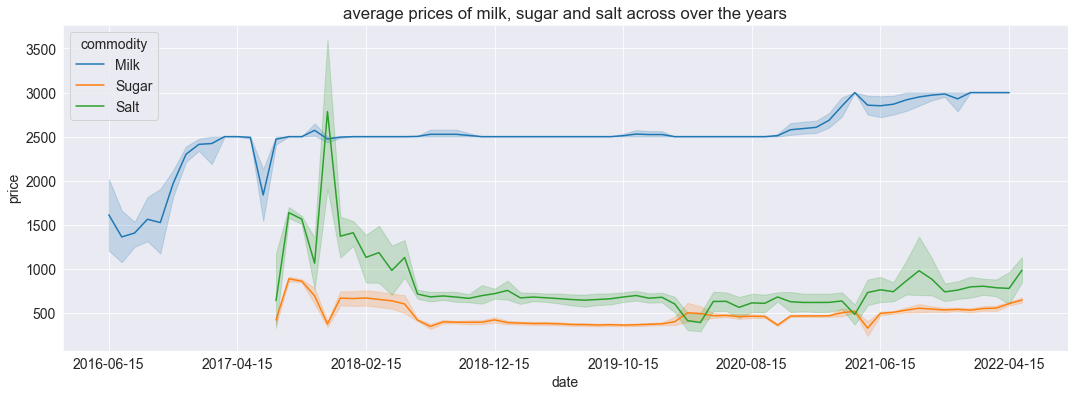

In [65]:
milk_sugar_salt_df=pd.concat([milk_dairy_df,sugar_df,salt_df])
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of milk, sugar and salt across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=milk_sugar_salt_df);

Milk prices seem to be at a steady level after rising while both sugar and salt are also at steady levels with almost similar prices with salt having a higher price than sugar

## Fuel

In [66]:
fuel_diesel_df=non_food_df[non_food_df.commodity=='Fuel (diesel)'].copy()
fuel_petrol_df=non_food_df[non_food_df.commodity=='Fuel (petrol-gasoline)'].copy()

Let's see a descriptive summary of the prices of fuel

In [67]:
summary_df([fuel_diesel_df,fuel_petrol_df],['fuel (diesel)','fuel (petrol)'])

,type,count,mean,std,min,25%,50%,75%,max
price,fuel (diesel),1304.0,226.0,99.0,44.0,160.0,210.0,245.0,848.0
price,fuel (petrol),1306.0,147.0,33.0,28.0,129.0,145.0,164.0,371.0


Diesel has the highest fuel price at 850 while petrol has the lowest at 30

Let's plot a line chart to see the changes in their prices over the years

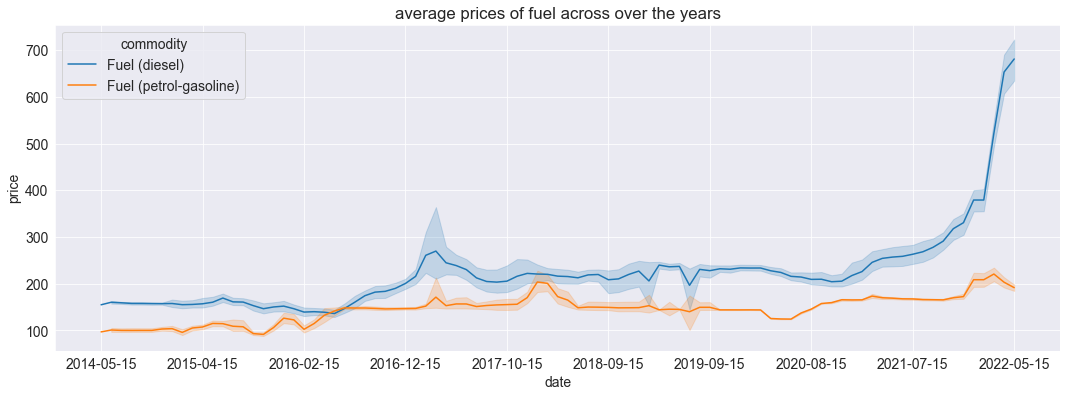

In [68]:
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.title('average prices of fuel across over the years')
sns.lineplot(x='date',y='price',hue='commodity',data=non_food_df);

The prices of diesel has risen exponentially in the recent years while the price of petrol has remain relatively the same

## Asking and Answering Questions

Let's get to know some relevant information using the dataset. I will only use information available for 2022 in order to have a more accurate and recent result

#### Q1: What is the percentage increase in price of all commodities?
##### Which food has the highest price increase?
##### Which food has the highest price decrease?

First, I will convert the date column into it's appropriate datatype

In [69]:
food_price_df.date=pd.to_datetime(food_price_df.date)

Next, I extract information (row) pertaining to 2022 only

In [70]:
food_price_2022_df=food_price_df[food_price_df.date >= '2022-01-01'].copy()
food_price_2022_df.sort_values('date',inplace=True)

In [71]:
commodities=food_price_2022_df.commodity.unique()
percentage_increase_df=pd.DataFrame()

for commodity in commodities:
    commodity_df=food_price_2022_df[food_price_2022_df.commodity==commodity]
    start_price=commodity_df.iloc[0,10]
    current_price=commodity_df.iloc[commodity_df.shape[0]-1,10]
    percentage_increase=(current_price-start_price)/start_price*100
    row=pd.DataFrame({'commodity':commodity,'percentage increase':percentage_increase},index=[percentage_increase_df.size])
    percentage_increase_df=pd.concat([percentage_increase_df,row],ignore_index=True)

percentage_increase_df=percentage_increase_df.sort_values('percentage increase',ascending=False).reset_index(drop=True)
percentage_increase_df.round()

,commodity,percentage increase
0,Watermelons,1150.0
1,Yam (Abuja),623.0
2,Bananas,344.0
3,Fish,300.0
4,Bread,128.0
5,Yam,106.0
6,Tomatoes,100.0
7,Beans (white),100.0
8,Fuel (diesel),94.0
9,Groundnuts,91.0


Let's visualize that with the aid of a bar chart

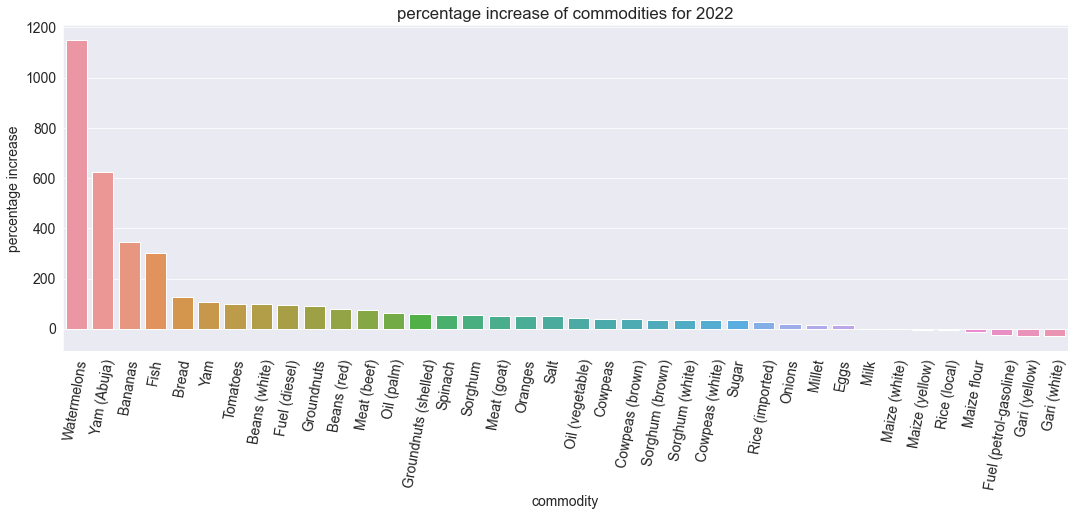

In [72]:
plt.title('percentage increase of commodities for 2022')
plt.xticks(rotation=80)
sns.barplot(x='commodity',y='percentage increase',data=percentage_increase_df);

It seems that watermelon has the highest percentage increase, tomatoes and white beans have doubled in price, milk seems to have no change in price at all while the price of white gari seems to have the lowest price increase at -30 meaning it has decreased by 30% from the beginning of 2022

#### Q2: Which states have the highest prices of commodities?

In [73]:
highest_price_df=pd.DataFrame()

for commodity in commodities:
    highest_price=food_price_2022_df.loc[food_price_2022_df.commodity==commodity,'price'].max()
    state=food_price_2022_df.loc[food_price_2022_df.price==highest_price,'state'].iloc[0]
    row=pd.DataFrame({'commodity':commodity,'state':state,'highest price':highest_price},index=[highest_price_df.size])
    highest_price_df=pd.concat([highest_price_df,row],ignore_index=True)
    
highest_price_df.round()

,commodity,state,highest price
0,Bread,Yobe,400.0
1,Fish,Yobe,800.0
2,Meat (beef),Yobe,4533.0
3,Meat (goat),Yobe,3850.0
4,Salt,Yobe,1600.0
5,Sugar,Borno,788.0
6,Oil (palm),Borno,1392.0
7,Oil (vegetable),Borno,1346.0
8,Beans (red),Borno,769.0
9,Beans (white),Borno,769.0


These are the highest prices of each commodity in 2022

Let's see the states with the highest prices of commodities

In [74]:
highest_price_freq_df=pd.DataFrame(highest_price_df.groupby('state')['state'].count())
highest_price_freq_df['frequency']=highest_price_freq_df.index
highest_price_freq_df.reset_index(drop=True,inplace=True)
highest_price_freq_df.rename(columns={'state':'frequency','frequency': 'state'},inplace=True)
highest_price_freq_df=highest_price_freq_df.reindex(['state','frequency'],axis=1).sort_values('frequency',ascending=False)
highest_price_freq_df

,state,frequency
6,Yobe,16
2,Borno,11
0,Abia,7
1,Adamawa,1
3,Kaduna,1
4,Katsina,1
5,Lagos,1


Let's visualize that with the aid of a bar chart

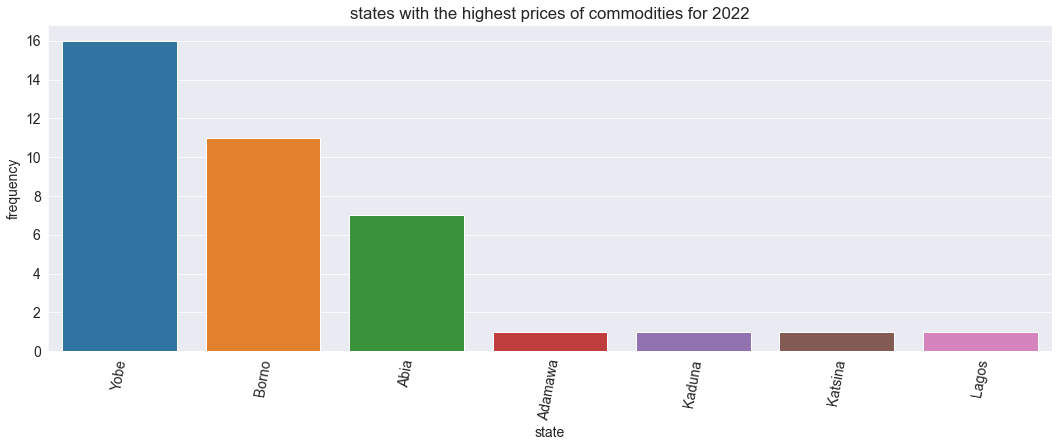

In [75]:
plt.title('states with the highest prices of commodities for 2022')
plt.xticks(rotation=80)
sns.barplot(x='state',y='frequency',data=highest_price_freq_df);

Yobe has the highest prices of items in 2022 followed by Borno and Abia

#### Q3: Which states have the lowest prices of commodities?

In [76]:
lowest_price_df=pd.DataFrame()

for commodity in commodities:
    lowest_price=food_price_2022_df.loc[food_price_2022_df.commodity==commodity,'price'].min()
    state=food_price_2022_df.loc[food_price_2022_df.price==lowest_price,'state'].iloc[0]
    row=pd.DataFrame({'commodity':commodity,'state':state,'lowest price':lowest_price},index=[lowest_price_df.size])
    lowest_price_df=pd.concat([lowest_price_df,row],ignore_index=True)
    
lowest_price_df.round()

,commodity,state,lowest price
0,Bread,Borno,97.0
1,Fish,Yobe,83.0
2,Meat (beef),Borno,888.0
3,Meat (goat),Yobe,1000.0
4,Salt,Yobe,200.0
5,Sugar,Borno,385.0
6,Oil (palm),Kebbi,492.0
7,Oil (vegetable),Yobe,500.0
8,Beans (red),Yobe,417.0
9,Beans (white),Yobe,208.0


These are the lowest prices of each commodity in 2022

Let's see the states with the lowest prices of commodities

In [77]:
lowest_price_freq_df=pd.DataFrame(lowest_price_df.groupby('state')['state'].count())
lowest_price_freq_df['frequency']=lowest_price_freq_df.index
lowest_price_freq_df.reset_index(drop=True,inplace=True)
lowest_price_freq_df.rename(columns={'state':'frequency','frequency': 'state'},inplace=True)
lowest_price_freq_df=lowest_price_freq_df.reindex(['state','frequency'],axis=1).sort_values('frequency',ascending=False)
lowest_price_freq_df

,state,frequency
7,Yobe,16
2,Borno,11
5,Lagos,4
6,Oyo,3
0,Abia,1
1,Adamawa,1
3,Kaduna,1
4,Kebbi,1


Let's visualize that with the aid of a bar chart

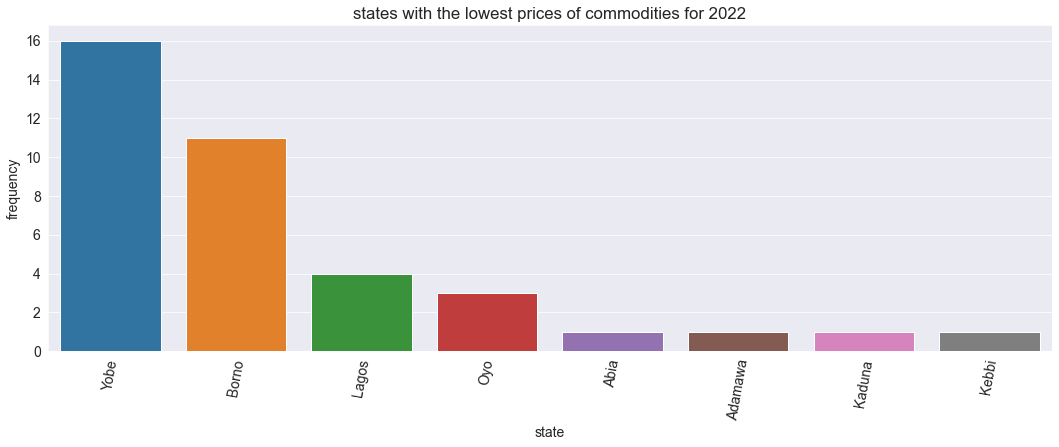

In [78]:
plt.title('states with the lowest prices of commodities for 2022')
plt.xticks(rotation=80)
sns.barplot(x='state',y='frequency',data=lowest_price_freq_df);

Yobe suprisingly also has the lowest prices of items in 2022 followed by Borno again and Lagos

#### Q4: What is the average change in price of each commodity?

In [79]:
price_change_df=pd.DataFrame()

for commodity in commodities:
    commodity_df=food_price_2022_df.loc[food_price_2022_df.commodity==commodity]
    seq=np.arange(commodity_df.price.size)
    fit=np.polyfit(seq,commodity_df.price,1)
    slope=fit[0]
    row=pd.DataFrame({'commodity':commodity,'average change in price':slope},index=[price_change_df.size])
    price_change_df=pd.concat([price_change_df,row],ignore_index=True)
    
price_change_df.sort_values('average change in price',ascending=False,inplace=True)
price_change_df.round(3)

,commodity,average change in price
37,Yam (Abuja),25.077
27,Fuel (diesel),5.438
6,Oil (palm),4.762
7,Oil (vegetable),4.724
12,Groundnuts,1.889
5,Sugar,1.775
0,Bread,1.657
2,Meat (beef),1.405
3,Meat (goat),1.102
4,Salt,1.046


Let's visualize that with the aid of a bar chart

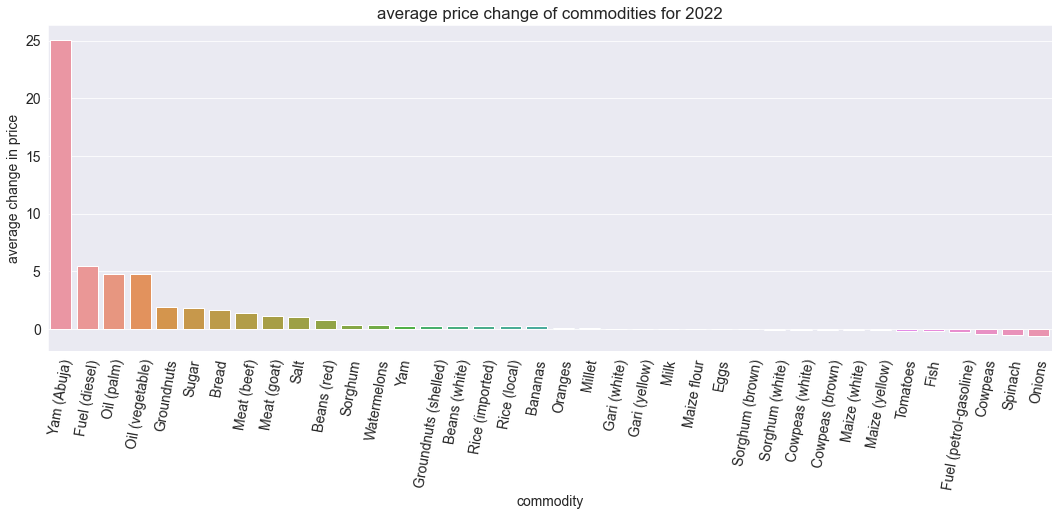

In [80]:
plt.title('average price change of commodities for 2022')
plt.xticks(rotation=80)
sns.barplot(x='commodity',y='average change in price',data=price_change_df);

Abuja Yam has the highest price change in 2022. There seem to be relatively small changes in price with the exception of commodities like diesel fuel and oils and the exceptionally high Abuja Yam

#### Q5: Are prices rising or not?

This is an extension of the previous question, we will see whether the prices of commodities are generally rising or not by checking a few statistics

In [81]:
price_change_df['average change in price'].describe()

count    38.000000
mean      1.292702
std       4.210361
min      -0.654749
25%      -0.087899
50%       0.148968
75%       0.968121
max      25.077000
Name: average change in price, dtype: float64

There seems to be an average of 4 Naira rise in prices perday. So, prices are steadily rising generally

## Inferences and Conclusion

From all what we have done, we can conclude that there is a general steady rise in prices of commodities in 2022. We also see that sevaral similar commodities have a similar price distribution with very small differences.

## References and Future Work

This dataset only contains data for the first half of 2022. I look forward to repeating the same analysis for the coming months in order to accurately capture the trend in commodity prices which is definitely going to be helpful due to the Russo-Ukraine war influencing world food prices

This dataset is gotten from [HUMANITARIAN DATA EXCHANGE](data.humdata.org)

In [82]:
import jovian

<IPython.core.display.Javascript object>

In [83]:
project_name = 'analysis-of-nigerian-food-prices'
food_prices = 'wfp_food_prices_nga.csv'

In [86]:
jovian.commit(filename='Analysis of Nigerian food prices.ipynb',project=project_name,files=[food_prices])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ahmadumeta4-1/analysis-of-nigerian-food-prices" on https://jovian.ai/
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ahmadumeta4-1/analysis-of-nigerian-food-prices


'https://jovian.ai/ahmadumeta4-1/analysis-of-nigerian-food-prices'

In [87]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
